# Satellite Data Exploratory Data Analysis
This repo is a starting point for exploring the satellite data. You must have the setup (outlined in the README) completed before running this notebook.

## Getting the data
To explore the data, you first need to download it locally. There is more data than we need, so we will only be using the hrv channel satellite data for 2022. Download all the hrv data for 2022 (linked [here](https://huggingface.co/datasets/openclimatefix/eumetsat-rss/tree/main/data/2022/hrv)). There are ten data files.

**It is important that you read the "Note on version control for data" section of the README linked [here](https://github.com/WAT-ai/open-climate-fix-project/blob/main/README.md#note-on-version-control-for-data).**


## Unzipping the data
The data files are in zarr format, and they also come zipped. First you must unzip the files. You can use the [unzip.py](https://github.com/WAT-ai/open-climate-fix-project/blob/2c2b70e42a78a051050ff331eee56a5dd7f3c1f0/utils/unzip.py) script, or you can unzip your files using whatever method you like. Just make sure to save the data in the `data/` folder in your working directory. The steps to using the unzip.py script are linked [here](https://github.com/WAT-ai/open-climate-fix-project/blob/main/README.md#utilsunzippy).

For initial exploration we will be using only one of the ten data files for the year 2022. We can scale up to use more data down the road. Combining different files into one data set will be something we'll have to look into.

In [1]:
import time

import imagecodecs
import jpeg_xl_float_with_nans
import pandas as pd
import numpy as np
import datetime
import xarray as xr
import matplotlib.pyplot as plt

## Loading Data
We will be using xarray to load the zarr data into a usable format. Once loaded, the data is stored in an Xarray Dataset class. Google package documentation and tutorials to better understand how to use xarray and zarr. These are formats we are going to be using A LOT, so it is best to get comfortable with them.

In [2]:
DATA_PATH = '../data/2022_000045-of-000056.zarr'
# here is an example: 'C:/Users/areel/watai/watai_repo/data/satellite/hrv/2022/2022_000017-of-000056.zarr'

In [3]:
dataset = xr.open_dataset(DATA_PATH, engine='zarr', chunks='auto')

ValueError: unrecognized engine zarr must be one of: ['scipy', 'store']

Browse through the preview and take a look at the variables. See if any interest you.

In [5]:
dataset

<xarray.Dataset>
Dimensions:                      (time: 1000, y_geostationary: 4176,
                                  x_geostationary: 5741, variable: 1)
Coordinates:
  * time                         (time) datetime64[ns] 2022-06-16T06:55:00 .....
  * variable                     (variable) <U3 'HRV'
  * x_geostationary              (x_geostationary) float64 -2.812e+06 ... 2.9...
  * y_geostationary              (y_geostationary) float64 1.395e+06 ... 5.57...
Data variables:
    data                         (time, y_geostationary, x_geostationary, variable) float32 dask.array<chunksize=(2, 2088, 2784, 1), meta=np.ndarray>
    x_geostationary_coordinates  (time, x_geostationary) float64 dask.array<chunksize=(1000, 5741), meta=np.ndarray>
    y_geostationary_coordinates  (time, y_geostationary) float64 dask.array<chunksize=(1000, 4176), meta=np.ndarray>

The data is indexed by datetime objects in 5 minute intervals.

In [6]:
dataset.indexes

Indexes:
    time             DatetimeIndex(['2022-06-16 06:55:00', '2022-06-16 07:00:00',
               '2022-06-16 07:05:00', '2022-06-16 07:10:00',
               '2022-06-16 07:15:00', '2022-06-16 07:20:00',
               '2022-06-16 07:25:00', '2022-06-16 07:30:00',
               '2022-06-16 07:35:00', '2022-06-16 07:40:00',
               ...
               '2022-06-19 17:25:00', '2022-06-19 17:30:00',
               '2022-06-19 17:35:00', '2022-06-19 17:40:00',
               '2022-06-19 17:45:00', '2022-06-19 17:50:00',
               '2022-06-19 17:55:00', '2022-06-19 18:00:00',
               '2022-06-19 18:05:00', '2022-06-19 18:10:00'],
              dtype='datetime64[ns]', name='time', length=1000, freq=None)
    variable         Index(['HRV'], dtype='object', name='variable')
    x_geostationary  Float64Index([-2812377.7890205383,  -2811377.654671669, -2810377.5203227997,
              -2809377.3859739304,  -2808377.251625061, -2807377.1172761917,
              -280637

## Visualizing the data
The following cell visualizes a part of the data. You can change the `time_slice` variable to see the satellite data at different times.

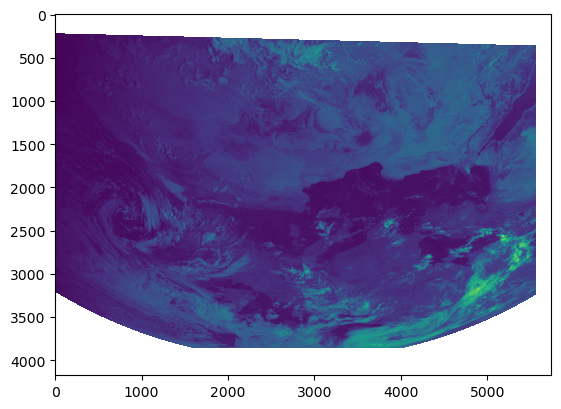

In [7]:
time_slice = '2022-06-16 06:55:00'
fig = plt.figure()
im = plt.imshow(dataset["data"].sel(time=time_slice))

# Explore!
If you've made it till here, congratulations! Hopefully you did not run into too many errors. Now it is up to you. Play around and explore the data.

**Please make sure to document your work. It would be much appreciated if you would read [this](https://www.notion.so/areel/Tips-and-Best-Practices-c8f3e8e6a5304c168e43bf656c75eb8d#f721552df9a04fc5a603d5ab11aa6da7) section of the notion page to see more about this.**

#### Some suggestions:
- Explore the time axis: The data is 5-minutely (each image is taken 5 minutes apart). Try creating a visualization where you show all the data over 1 hour (12 images) side by side. This way you will be able to see the direction in which the clouds moved over the hour.
- Explore the metadata: There is much more to this data than just the images. Perhaps explore the x_geostationary and y_geostationary data. Try zooming in to a specific area of the image. Maybe write a function that crops out sections of the images given x and y coordinates.

**Again: Please remember to document your work and create a record of your explorations.** Make notes about what you found interesting so that you can share them later. Much like this cell itself, could create notes as markdown cells in your notebook if you'd like.

Let's take a better look at how the index is formatted in terms of time. \
Note that we can select a specific index using the to_datetime object.

In [8]:
dataset.indexes['time']

DatetimeIndex(['2022-06-16 06:55:00', '2022-06-16 07:00:00',
               '2022-06-16 07:05:00', '2022-06-16 07:10:00',
               '2022-06-16 07:15:00', '2022-06-16 07:20:00',
               '2022-06-16 07:25:00', '2022-06-16 07:30:00',
               '2022-06-16 07:35:00', '2022-06-16 07:40:00',
               ...
               '2022-06-19 17:25:00', '2022-06-19 17:30:00',
               '2022-06-19 17:35:00', '2022-06-19 17:40:00',
               '2022-06-19 17:45:00', '2022-06-19 17:50:00',
               '2022-06-19 17:55:00', '2022-06-19 18:00:00',
               '2022-06-19 18:05:00', '2022-06-19 18:10:00'],
              dtype='datetime64[ns]', name='time', length=1000, freq=None)

Let's figure out the range of values on this dataset: \
It is clearly already normalized, so we would expect the max to be 1 and the min to be 0. (The subset we choose may not fully reflect the data - and keep in mind the entire sattelite dataset has been split into 56 batches of 1000 images each, which we can not process on a single local machine) \
Due to the lack of processing power on a local machine, we will just take a look at the range in a subset of the data. (I've tried running max/min on the entire dataset and it took >15 minutes before I stopped the task) \
The result seems to be 1.0 for the max and 0.012... for the min. This is in line with our expectations of 1.0 max and 0.0 min across the entire dataset, given that it's been normalized.

In [13]:
print(f'Max: {dataset["data"][0:100].max().values}')
print(f'Min: {dataset["data"][0:100].min().values}')

Max: 1.0
Min: 0.012340464629232883


Lets take a look at the dimensions of the dataset next: \
It has 4 dimensions - time, y_geostationary, x_geostationary, and variable. \
From our previous cells, it is clear that _time_ represents our index, and what time the sattelite image was taken at. \
_y_geostationary_ represents the y-axis of the images.
_x_geostationary_ represents the x-axis of the images.
_variable_ represents the value of the image at the exact pixel selected. It is between 0 and 1.

In [15]:
starting_time = pd.to_datetime("June 16 2022, 6:55am")
dataset["data"].dims

('time', 'y_geostationary', 'x_geostationary', 'variable')

Note that there exists NaN values in each of the images. They are the empty space around the satellite images of the Earth. One way we can handle them is by replacing the NaN values with 0 - however we may need to do a bit more research into what the best course of action is.

In [36]:
print(dataset["data"][0][0][0].isnull().values)

[ True]


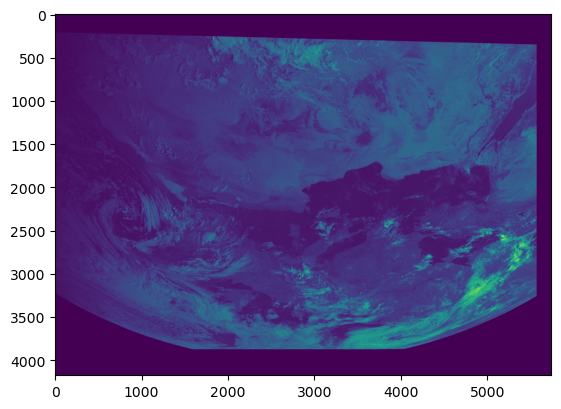

In [46]:
test_copy = dataset["data"].sel(time=time_slice).copy()
plt.imshow(test_copy.fillna(0))

Here is a function to plot satellite images over a range of time.
_starting_time_ - The first image to plot
_intervals_ - How many images to plot (in 5 minute intervals)
_columns, rows_ - How to structure the images

In [54]:
def plot_intervals(starting_time, intervals=12, columns=4, rows=3):
    columns = int(intervals / rows)
    fig = plt.figure(figsize=(15, 15))
    delta = datetime.timedelta(minutes=5)
    for i in range(1, columns*rows +1):
        time_slice = starting_time + delta * (i - 1)
        im = dataset["data"].sel(time=time_slice)
        fig.add_subplot(rows, columns, i, title=time_slice)
        plt.imshow(im)
    plt.show()



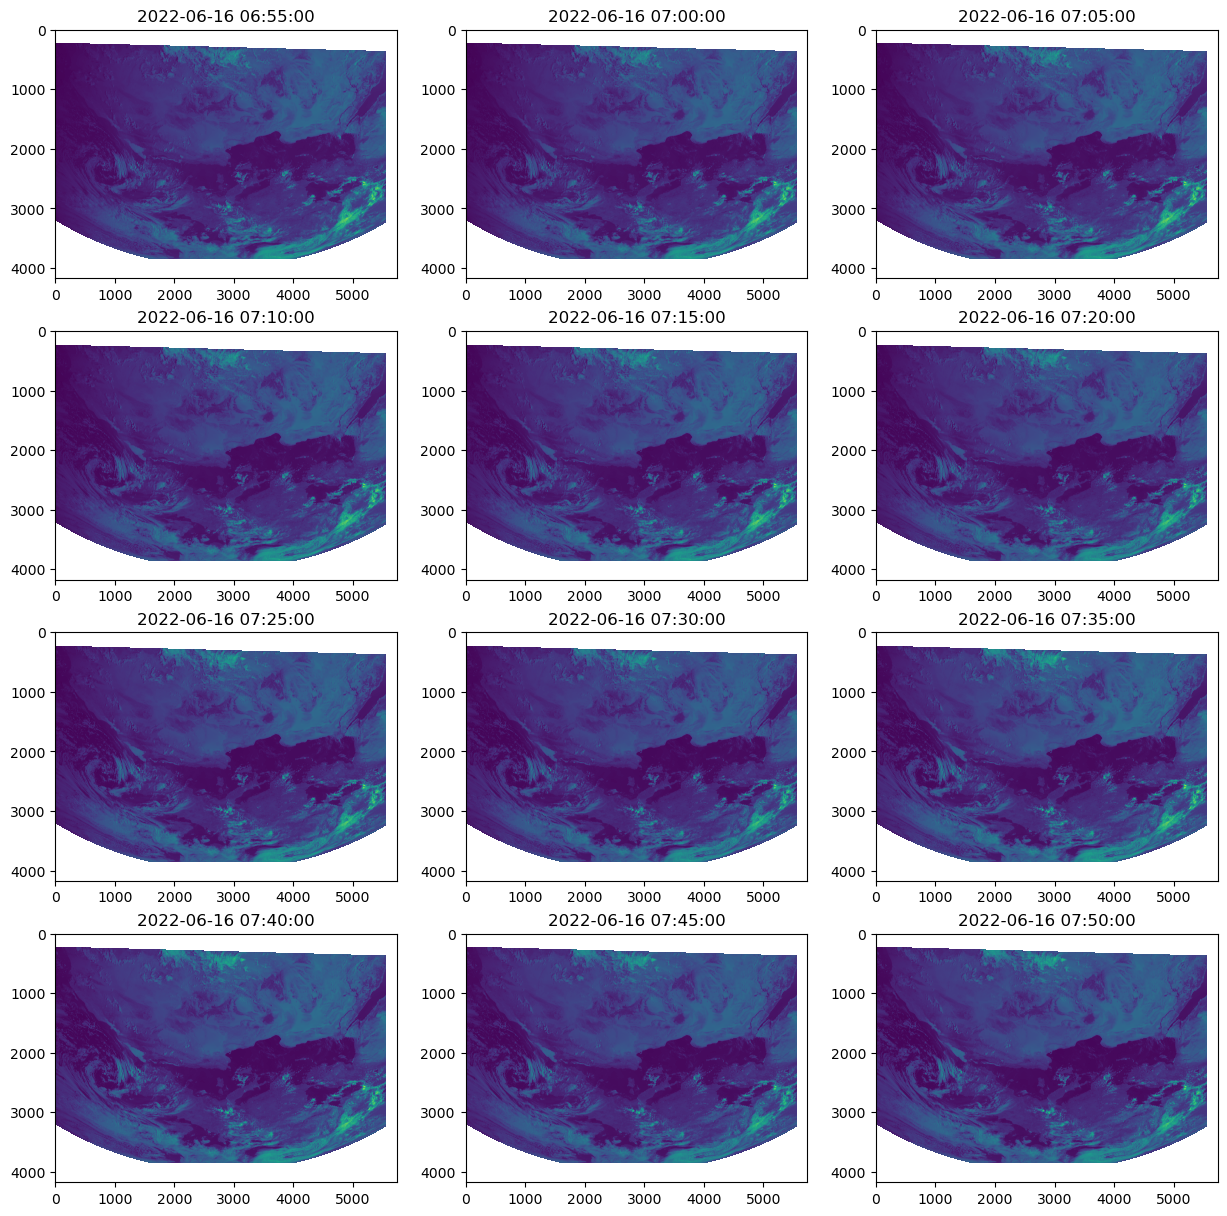

In [55]:
plot_intervals(starting_time,intervals=12, rows=4)

Here is a function to crop the images and plot it out.
_starting_time_ - Image to plot
_t, b, l, r_ - top, bottom, left, and right coordinates to keep in the crop

In [56]:
def plot_crop(starting_time,t, b, l, r):
    plt.imshow(dataset["data"].sel(time=starting_time)[t:b, l:r, :])

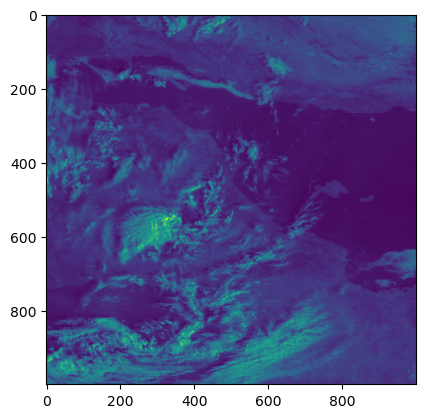

In [57]:
plot_crop(starting_time, 2000, 3000, 1500, 2500)

Finally, we have a function plot cropped images over an interval of time. It reveals a lot more details and you can notice minute cloud formation changes. It works similar to how the other two functions work.

Feel free to play around with the intervals to se if you can notice any changes.

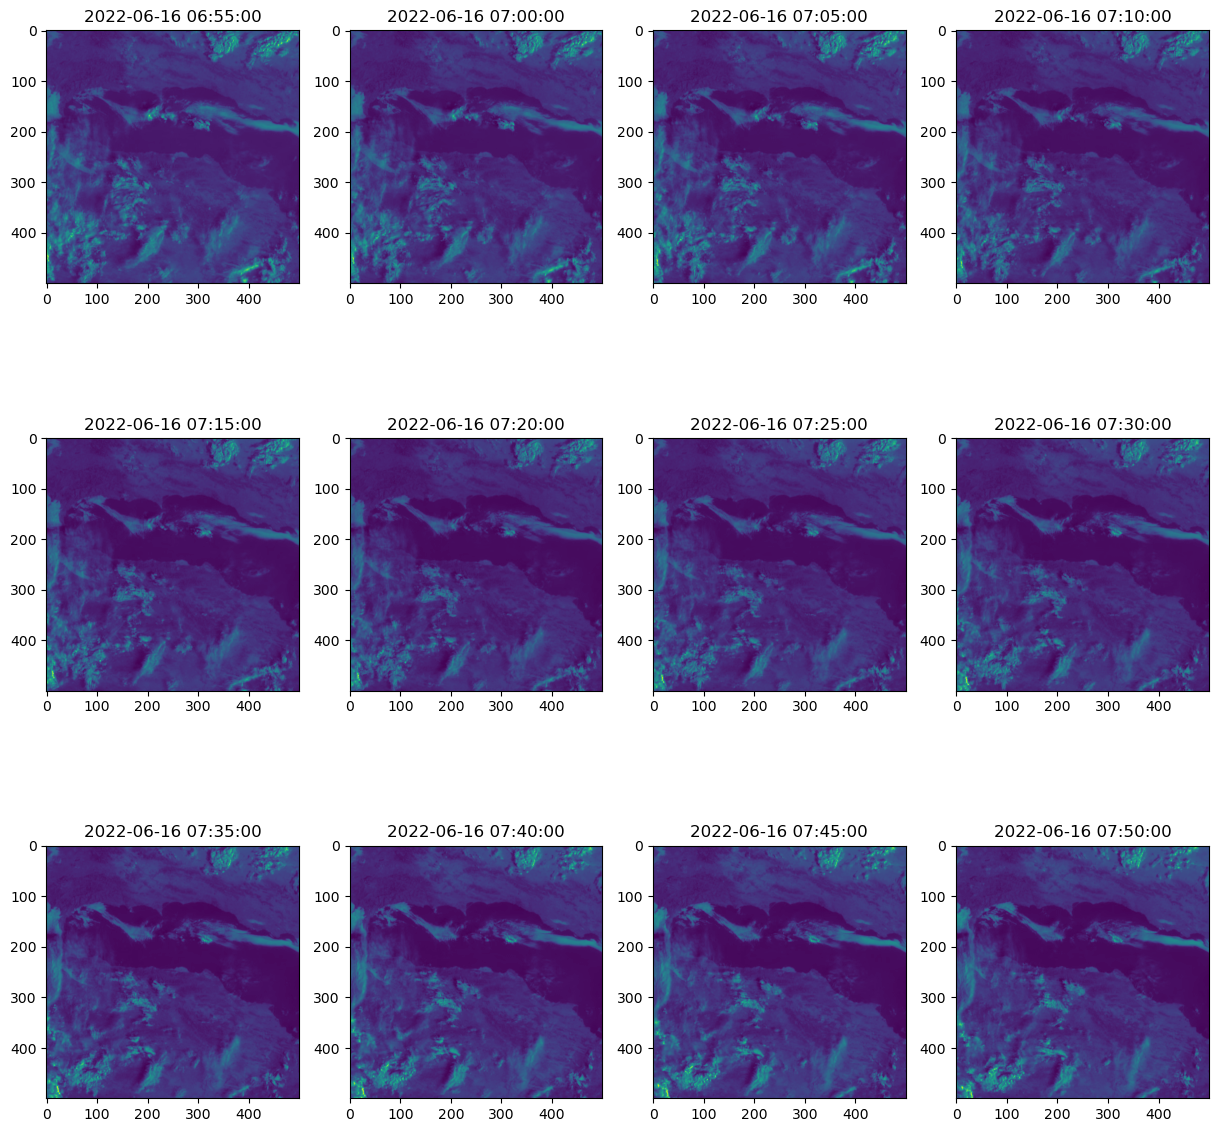

In [64]:
def plot_intervals_cropped(starting_time, t, b, l, r, intervals=12, columns=4, rows=3):
    columns = int(intervals / rows)
    fig = plt.figure(figsize=(15, 15))
    delta = datetime.timedelta(minutes=5)
    for i in range(1, columns*rows +1):
        time_slice = starting_time + delta * (i - 1)
        im = dataset["data"].sel(time=time_slice)[t:b, l:r, :]
        fig.add_subplot(rows, columns, i, title=time_slice)
        plt.imshow(im)
    plt.show()

plot_intervals_cropped(starting_time, 2000, 2500, 1500, 2000, intervals=12)

Below is a list of the metadata contained within the images. They are the same for all images

In [59]:
dataset["data"][0].attrs

{'HRV__satpy_id': '!!python/object/apply:satpy.dataset.dataid._unpickle\n- calibration:\n    enum:\n    - reflectance\n    - brightness_temperature\n    - radiance\n    - counts\n    transitive: true\n  modifiers:\n    default: !!python/object/new:satpy.dataset.dataid.ModifierTuple\n    - !!python/tuple []\n    type: !!python/name:satpy.dataset.dataid.ModifierTuple \'\'\n  name:\n    required: true\n  resolution:\n    transitive: false\n  wavelength:\n    type: !!python/name:satpy.dataset.dataid.WavelengthRange \'\'\n- calibration: reflectance\n  modifiers: !!python/object/new:satpy.dataset.dataid.ModifierTuple\n  - !!python/tuple []\n  name: HRV\n  resolution: 1000.134348869\n  wavelength: !!python/object/new:satpy.dataset.dataid.WavelengthRange\n  - 0.5\n  - 0.7\n  - 0.9\n  - "\\xB5m"\n',
 'HRV_ancillary_variables': [],
 'HRV_area': 'msg_seviri_rss_1km:\n  description: MSG SEVIRI Rapid Scanning Service area definition with 1 km resolution\n  projection:\n    proj: geos\n    lon_0: 9.